In [79]:
import os 

image_path=os.listdir(r"F:\AI instant\ml microsoft\DL\Notebooks - ANN - DNN\11.Auto encoder\Denoising dentists project\Dataset/")
print(len(image_path))



120


In [80]:
from keras.preprocessing.image import load_img,img_to_array
images=[]
for image in image_path:
    img=load_img(r"F:\AI instant\ml microsoft\DL\Notebooks - ANN - DNN\11.Auto encoder\Denoising dentists project\Dataset/"+image,target_size=(64,64),color_mode="grayscale")
    img=img_to_array(img)
    img=img/255.0
    images.append(img)


In [81]:
import numpy as np
images = np.array(images)

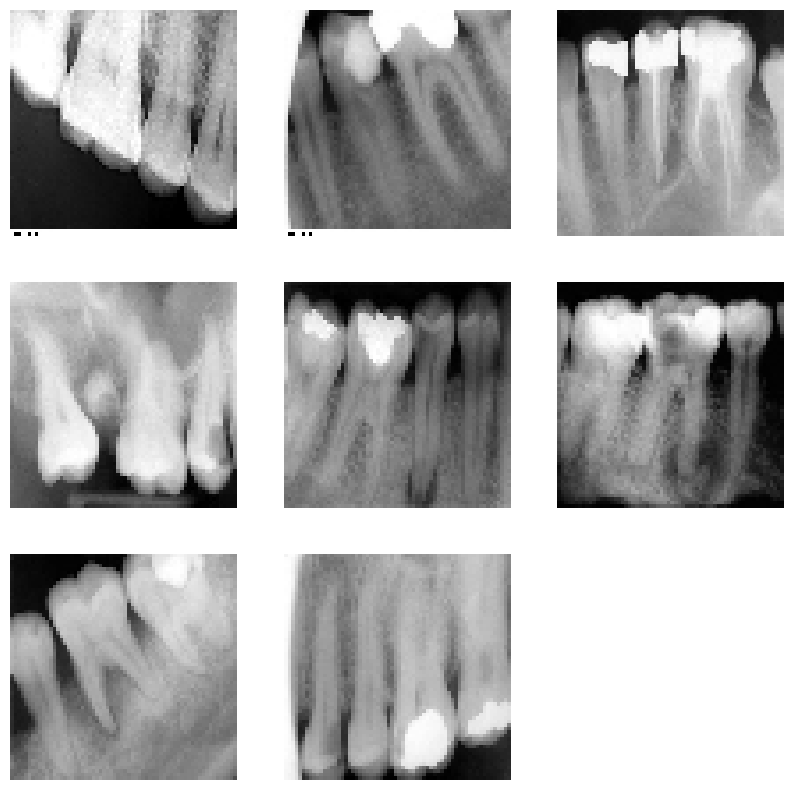

In [82]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(8):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i].reshape(64,64),cmap="gray")
    plt.axis("off")

In [83]:
fact=0.2
noise_image=[]
for i in images:
    imag= i + fact*np.random.randn(*i.shape)
    imag = np.clip(imag, 0., 1.)
    noise_image.append(imag)

In [84]:
noise_image = np.array(noise_image)

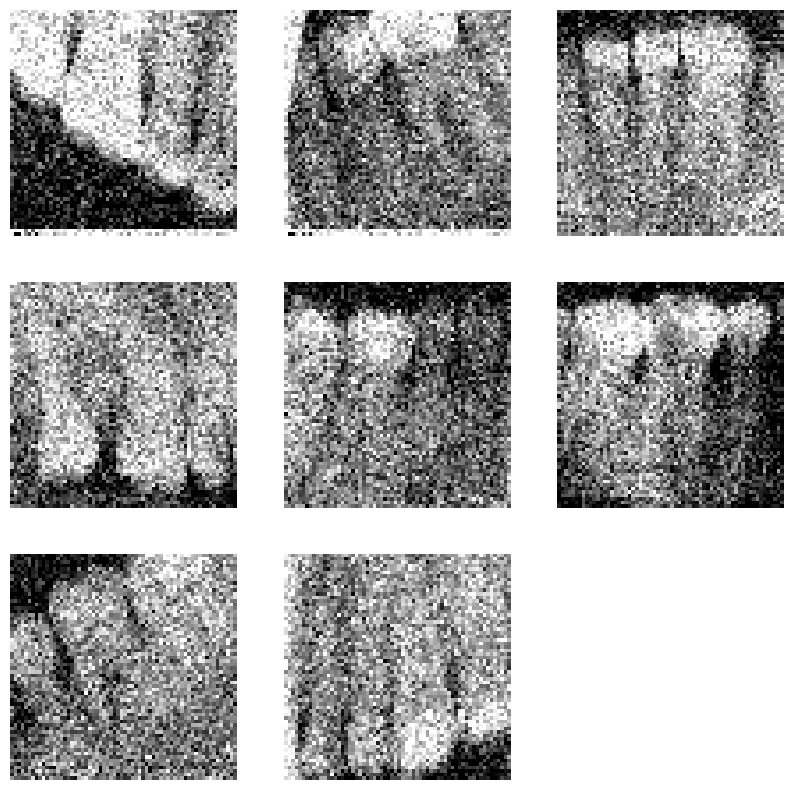

In [85]:
plt.figure(figsize=(10,10))
for i in range(8):
    plt.subplot(3,3,i+1)
    plt.imshow(noise_image[i].reshape(64,64),cmap="gray")
    plt.axis("off")

In [86]:
from keras.layers import Input,Conv2D,Dense,MaxPooling2D,Flatten,UpSampling2D,MaxPool2D
from keras.models import Model

def autoencoder():
    input_image=Input(shape=(64,64,1),name="input_shape")
    x=Conv2D(64,(3,3),activation="relu",padding="same",name="conv1",kernel_initializer="uniform")(input_image)
    x=MaxPooling2D((2,2),padding='same', name='pool1')(x)
    x=Conv2D(64,(3,3),kernel_initializer="uniform",padding="same",name="conv2",activation="relu")(x)
    x=MaxPooling2D((2,2),padding='same', name='pool2')(x)
    x=Conv2D(64,(3,3),kernel_initializer="uniform",padding="same",name="conv5",activation="relu")(x)
    x=MaxPooling2D((2,2),padding='same', name='pool3')(x)

    x=Conv2D(64,(3,3),activation="relu",padding="same",name="conv3",kernel_initializer="uniform")(x)
    x=UpSampling2D((2,2),name="upsampling1")(x)
    x=Conv2D(64,(3,3),activation="relu",padding="same",name="conv4",kernel_initializer="uniform")(x)
    x=UpSampling2D((2,2),name="upsampling2")(x)
    x=Conv2D(64,(3,3),activation="relu",padding="same",name="conv6",kernel_initializer="uniform")(x)
    x=UpSampling2D((2,2),name="upsampling3")(x)

    x = Conv2D(1, (3,3), activation='sigmoid', padding='same', name='Conv5')(x)
    
    autencodes=Model(inputs=input_image,outputs=x)
    autencodes.compile(optimizer='adam', loss='binary_crossentropy')

    return autencodes




    



In [87]:
model= autoencoder()
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_shape (InputLayer)        │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 64, 64, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv5 (Conv2D)                  │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ upsampling1 (UpSampling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ upsampling2 (UpSampling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv6 (Conv2D)                  │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ upsampling3 (UpSampling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv5 (Conv2D)                  │ (None, 64, 64, 1)      │           577 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,857 (726.00 KB)

 Trainable params: 185,857 (726.00 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
noise_train = noise_image[:80]
noise_test = noise_image[80:]

noise_train.shape, noise_test.shape

((80, 64, 64, 1), (40, 64, 64, 1))

In [89]:
normal_train = images[:80]
normal_test = images[80:]

normal_train.shape, normal_test.shape

((80, 64, 64, 1), (40, 64, 64, 1))

In [90]:
model.fit(noise_train,
                 normal_train,
                 validation_data=(noise_test, normal_test),
                 epochs=50,
                 batch_size=16)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 625ms/step - loss: 0.6927 - val_loss: 0.6885
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 442ms/step - loss: 0.6833 - val_loss: 0.6760
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 435ms/step - loss: 0.6658 - val_loss: 0.6560
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 431ms/step - loss: 0.6471 - val_loss: 0.6472
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 433ms/step - loss: 0.6374 - val_loss: 0.6321
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 433ms/step - loss: 0.6244 - val_loss: 0.6207
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 462ms/step - loss: 0.6121 - val_loss: 0.6103
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 425ms/step - loss: 0.6065 - val_loss: 0.6077
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 427ms/step - loss: 0.6066 - val_loss: 0.6051
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 433ms/step - loss: 0.6025 - val_loss: 0.6003
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 861ms/step - loss: 0.5894 - val_loss: 0.5976
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 471ms/step - loss: 0.5874 - val_l

In [91]:
y_pre = model.predict(noise_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 498ms/step


In [92]:
model.evaluate(noise_test, normal_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.5691


0.5698720216751099

In [93]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(normal_test.flatten(),y_pre.flatten())

In [94]:
mse

0.006993184797465801

In [95]:
def show_image(y_pre,normal_test):
     plt.figure(figsize=(12, 6))

   
     for i in range(16):
        plt.subplot(4, 8, i + 1)
        plt.imshow(normal_test[i], cmap='gray')
        plt.axis('off')
        plt.title('Noised')

     for i in range(16):
        plt.subplot(4, 8, i + 17)
        plt.imshow(y_pre[i], cmap='gray')
        plt.axis('off')
        plt.title('Predicted')

     plt.show()

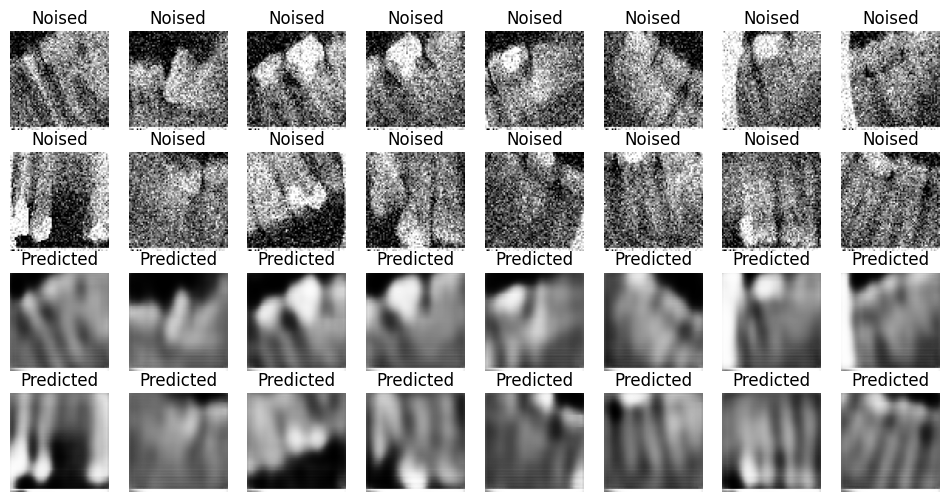

In [96]:
show_image(y_pre,noise_test,)